In [248]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import log, exp, sin, cos, sqrt

In [249]:
x0 = 1
x1 = 3
y0 = 1

In [250]:
# Получение функции шага 4-x четырёхшагового метода CREK
A = [
    [0,       0,        0,       0],
    [12/23,   0,        0,       0],
    [-68/375, 368/375,  0,       0],
    [31/144,  529/1152, 125/384, 0]
]

B = [
    lambda theta: 41/72 * theta**3 - 65/48 * theta**2 + theta,
    lambda theta: -529/576 * theta**3 + 529/384 * theta**2,
    lambda theta: -125/192 * theta**3 + 125/128 * theta**2,
    lambda theta: theta**3 - theta**2
]

C = [0, 12/23, 4/5, 1]


In [251]:
# Правая часть дифференциального уравнения
def f_delay(x, phi):
    return phi / (2 * sqrt(x))

def BinarySearch(x, arr):
    mid = len(arr) // 2
    low = 0
    high = len(arr) - 1
    
    while arr[mid] != x and low <= high:
        if x > arr[mid]:
            low = mid + 1
        else:
            high = mid - 1
        mid = (low + high) // 2
    
    return mid

# Рассчёт значения из прошлого шагом плотной выдачи
def phi(x, X, Y, K, h):
    if x < x0:
        return 1
    if x in X:
        return Y[X.index(x)]

    i_xm = BinarySearch(x, X)
    
    theta = (x - X[i_xm]) / h

    return Y[i_xm] + h * sum([K[i_xm][i] * B[i](theta) for i in range(len(B))])

# Запаздывание
def tau(x, y):
    return y - sqrt(2) + 1

# Шаговая функция
def CREKStepDelay(X, Y, h, K):
    b = [b(1) for b in B]
    x = X[-1]
    y = Y[-1]

    TAU1 = tau(x, y)
    K1 = f_delay(x, phi(TAU1, X, Y, K, h))

    TAU2 = tau(x + C[1] * h, y + h * (A[1][0] * K1))
    K2 = f_delay(x + C[1] * h, phi(TAU2, X, Y, K, h))

    TAU3 = tau(x + C[2] * h, y + h * (A[2][0] * K1 + A[2][1] * K2))   
    K3 = f_delay(x + C[2] * h, phi(TAU3, X, Y, K, h))

    TAU4 = tau(x + C[3] * h, y + h * (A[3][0] * K1 + A[3][1] * K2 + A[3][2] * K3))       
    K4 = f_delay(x + C[3] * h, phi(TAU4, X, Y, K, h))

    return x + h, y + h * (b[0] * K1 + b[1] * K2 + b[2] * K3 + b[3] * K4), [K1, K2, K3, K4]


In [252]:
def RKMethodDelay(h):
    X, Y, K = [x0], [y0], []
    
    while X[-1] != x1:
        if X[-1] + h > x1:
            x, y, k = CREKStepDelay(X, Y, x1-X[-1],  K)
            X.append(x1)
        else:
            x, y, k = CREKStepDelay(X, Y, h,  K)
            X.append(x)
        Y.append(y)
        K.append(k)
        
    return X, Y

In [253]:
# Точное решение 
xi1, xi2, xi3 = 1, 2, 5.0294372515248
def solution_delay(x):
    if x < xi1:
        return 1
    if x < xi2:
        return sqrt(x)
    else:
        return x/4 + 1/2 + (1 - 1 / sqrt(2)) * sqrt(x) 

Err = 3.087413413815909e-08


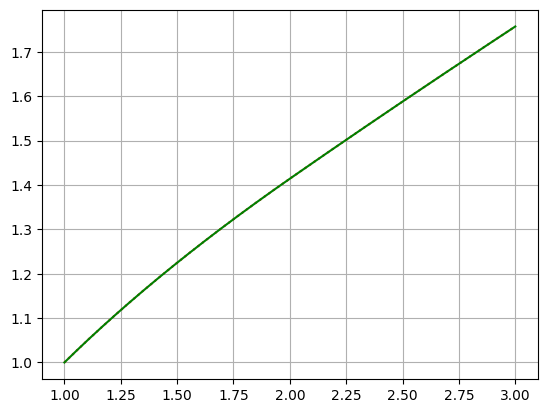

In [254]:
# Решение методдом РК
H = 0.001
x_delay, y_delay = RKMethodDelay(H)
fig, ax = plt.subplots()

trueSolDelay = [solution_delay(x) for x in x_delay]

ax.plot(x_delay, y_delay, 'r:')
ax.plot(x_delay, trueSolDelay, 'g')
ax.grid(True)

print(f'Err = {abs(y_delay[-1] - trueSolDelay[-1])}')

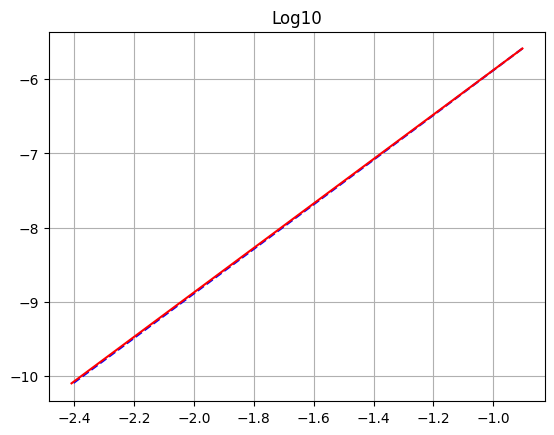

In [255]:
# График зависимости нормы точной погрешности в конце отрезка от шага h = 1/2^k, k=0,1,...,8
def graphPow2Delay():
  N = []
  H = []
  for k in range(3,9):
    h = 1 / 2 ** k
    H.append(np.log10(h))
    X, Y = RKMethodDelay(h)
    N.append(np.log10( abs(trueSolDelay[-1] - Y[-1]) ))

  y = N[0]+3*(H-H[0])

  fig, ax = plt.subplots()
  ax.set_title('Log10')
  ax.plot(H, N, color='b', linestyle='--')
  # ax.plot([-4, -1], [-6, 0], 'r')
  ax.plot(H, y, 'r')
  ax.grid(True)
  
graphPow2Delay()